# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [94]:
!pip install -q yfinance


In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

# Set up End and Start times for data grab
tech_list = ['TNG', 'GIL', 'EVE', 'ADS']

TNG = pd.read_csv("/kaggle/input/tng-stock-price/TNG.csv")
GIL = pd.read_csv("/kaggle/input/tng-stock-price/GIL.csv")
EVE = pd.read_csv("/kaggle/input/tng-stock-price/EVE.csv")
ADS = pd.read_csv("/kaggle/input/tng-stock-price/ADS.csv")

company_list = [TNG, GIL, EVE, ADS]
company_name = ["TNG", "GIL", "EVE", "ADS"]


for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Date,Close,Adj Close,Volume,Open,High,Low,Unnamed: 7,company_name
1444,15/01/2018,17.95,7.37,"12,630",17.90,17.95,17.40,NaN,ADS
1445,12/01/2018,17.90,7.35,"10,010",17.90,17.90,17.85,NaN,ADS
1446,11/01/2018,17.90,7.35,"10,940",17.90,17.90,17.50,NaN,ADS
1447,10/01/2018,17.90,7.35,"14,110",17.80,17.90,17.80,NaN,ADS
1448,09/01/2018,17.80,7.31,"38,770",17.65,18.05,17.55,NaN,ADS
1449,08/01/2018,17.65,7.25,"22,000",17.50,17.65,17.40,NaN,ADS
1450,05/01/2018,17.55,7.21,"9,490",17.45,17.55,17.40,NaN,ADS
1451,04/01/2018,17.50,7.19,"9,600",17.50,17.50,17.40,NaN,ADS
1452,03/01/2018,17.50,7.19,"19,390",17.20,17.50,17.20,NaN,ADS
1453,02/01/2018,17.45,7.17,"49,160",17.45,17.45,17.20,NaN,ADS


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [96]:
TNG["Date"]=pd.to_datetime(TNG["Date"], format='%d/%m/%Y')
EVE["Date"]=pd.to_datetime(TNG["Date"], format='%d/%m/%Y')
ADS["Date"]=pd.to_datetime(TNG["Date"], format='%d/%m/%Y')
GIL["Date"]=pd.to_datetime(TNG["Date"], format='%d/%m/%Y')

In [97]:
for i, company in enumerate(company_list, 1):
    company[company.columns[1:]] = company[company.columns[1:]].replace('[,]', '', regex=True)
    company['Volume'] = company['Volume'].astype('float64')

In [98]:
# Summary Stats
TNG.describe()

,Date,Close,Adj Close,Volume,Open,High,Low,Unnamed: 7
count,1443,1443.000000,1443.000000,1.443000e+03,1443.000000,1443.000000,1443.000000,0.0
mean,2020-11-26 07:05:06.860706816,19.500277,13.628649,1.714741e+06,19.506098,20.019612,19.079972,NaN
min,2018-01-02 00:00:00,7.700000,0.000000,3.200000e+04,7.200000,8.300000,7.200000,NaN
25%,2019-06-18 12:00:00,14.300000,8.680000,7.312585e+05,14.200000,14.700000,13.950000,NaN
50%,2020-11-20 00:00:00,18.100000,11.450000,1.394560e+06,18.100000,18.500000,17.700000,NaN
75%,2022-05-14 12:00:00,22.800000,18.070000,2.376097e+06,22.800000,23.350000,22.350000,NaN
max,2023-11-01 00:00:00,42.000000,33.040000,8.218625e+06,42.100000,42.600000,40.800000,NaN
std,NaN,6.592713,6.657162,1.324881e+06,6.625455,6.828440,6.449010,NaN


## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [99]:
# General info
TNG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1443 non-null   datetime64[ns]
 1   Close         1443 non-null   float64       
 2   Adj Close     1443 non-null   float64       
 3   Volume        1443 non-null   float64       
 4   Open          1443 non-null   float64       
 5   High          1443 non-null   float64       
 6   Low           1443 non-null   float64       
 7   Unnamed: 7    0 non-null      float64       
 8   company_name  1443 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 101.6+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

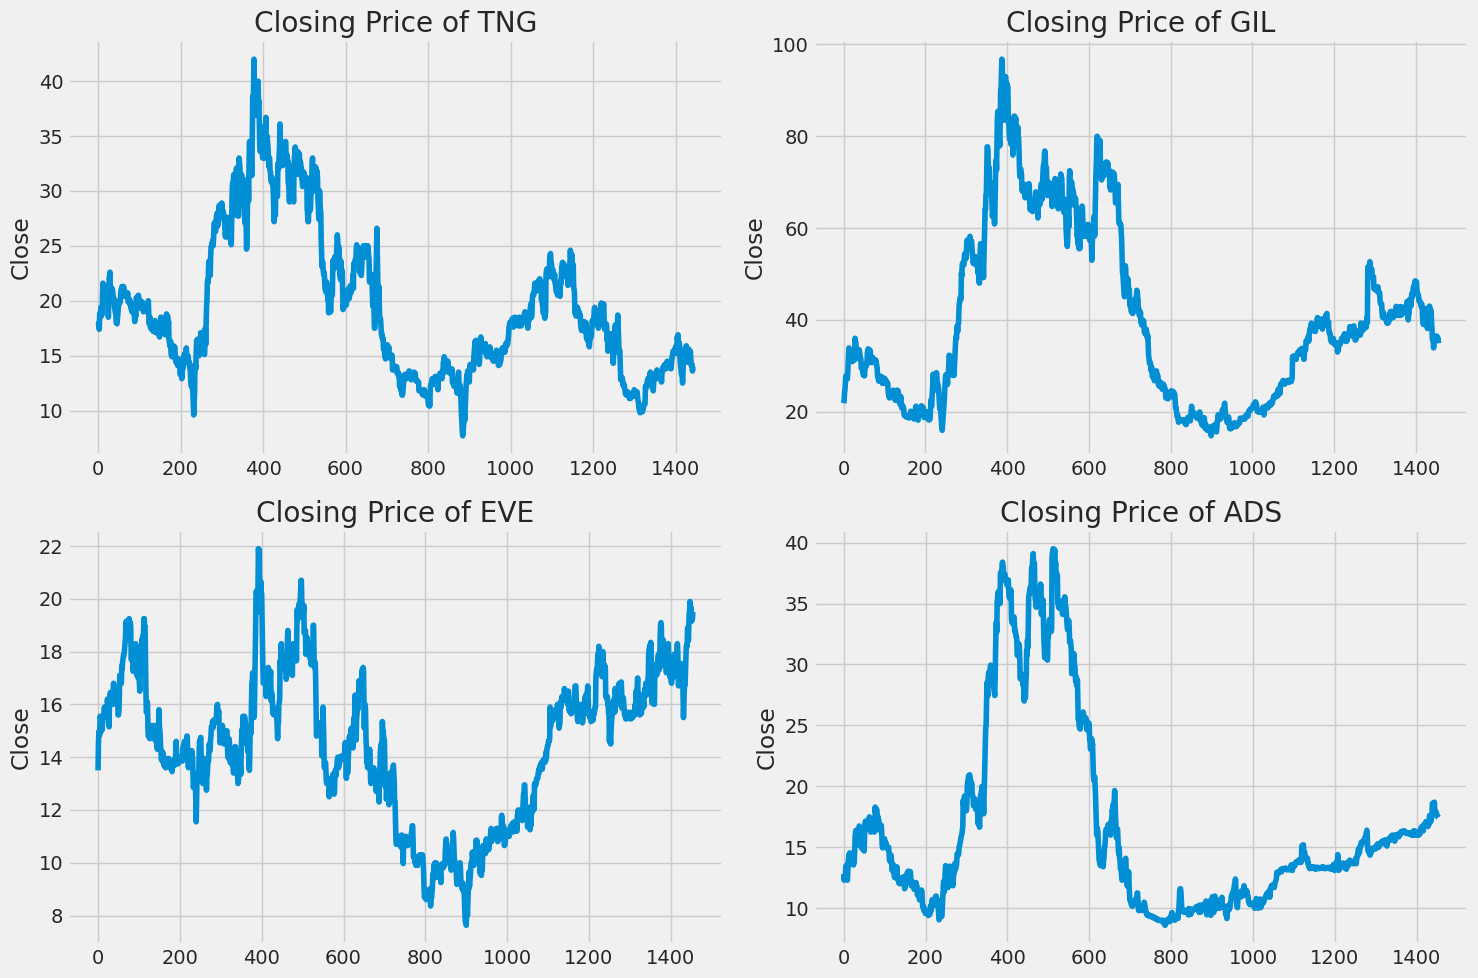

In [100]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

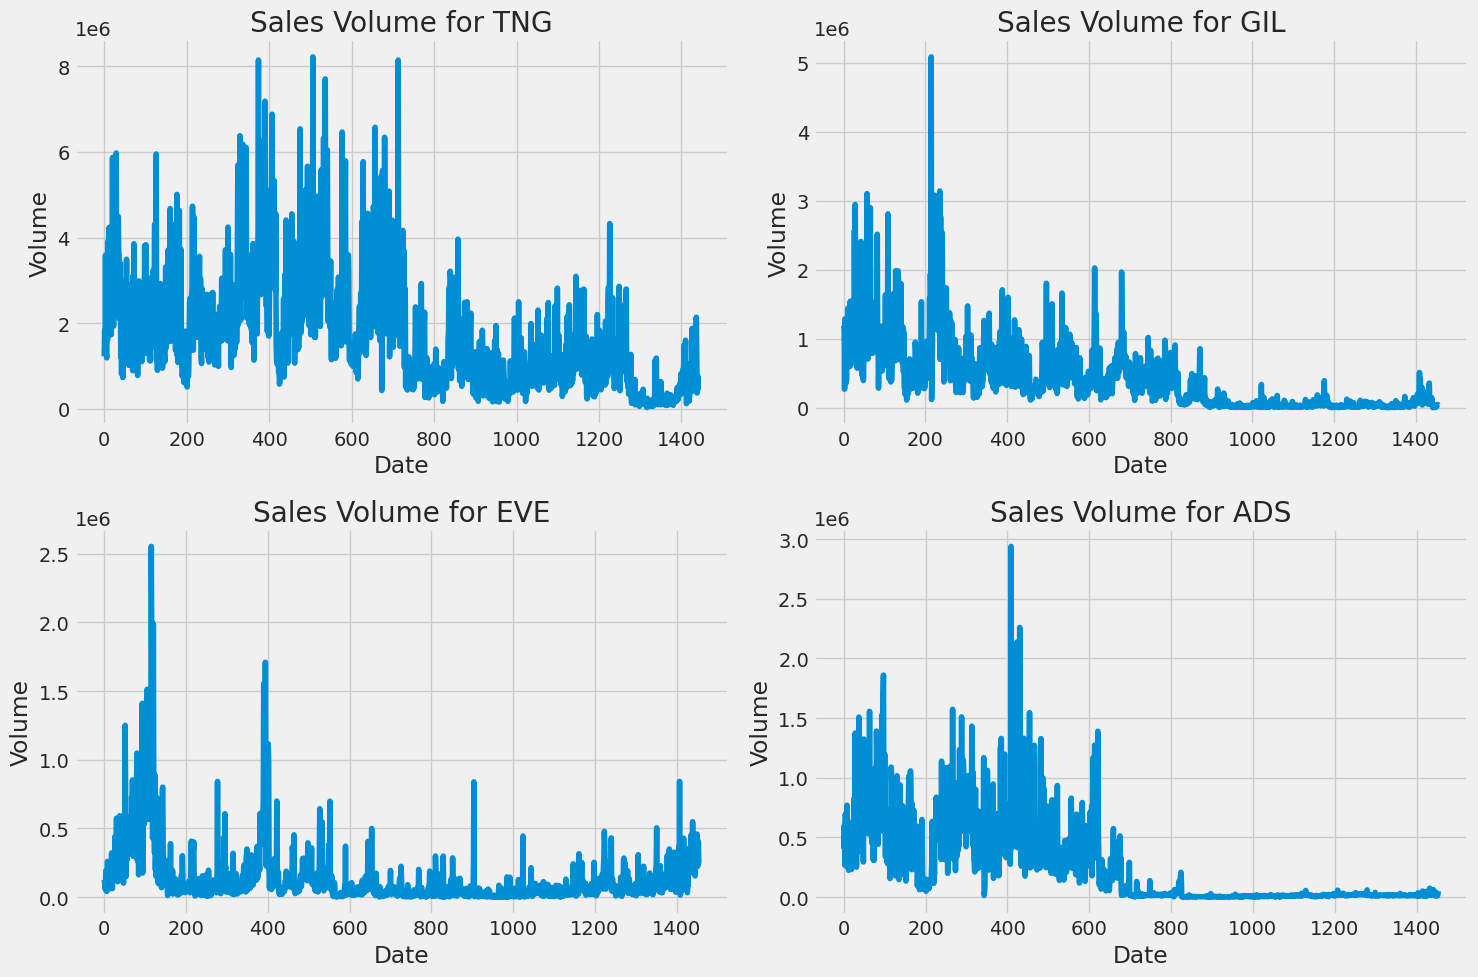

In [101]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

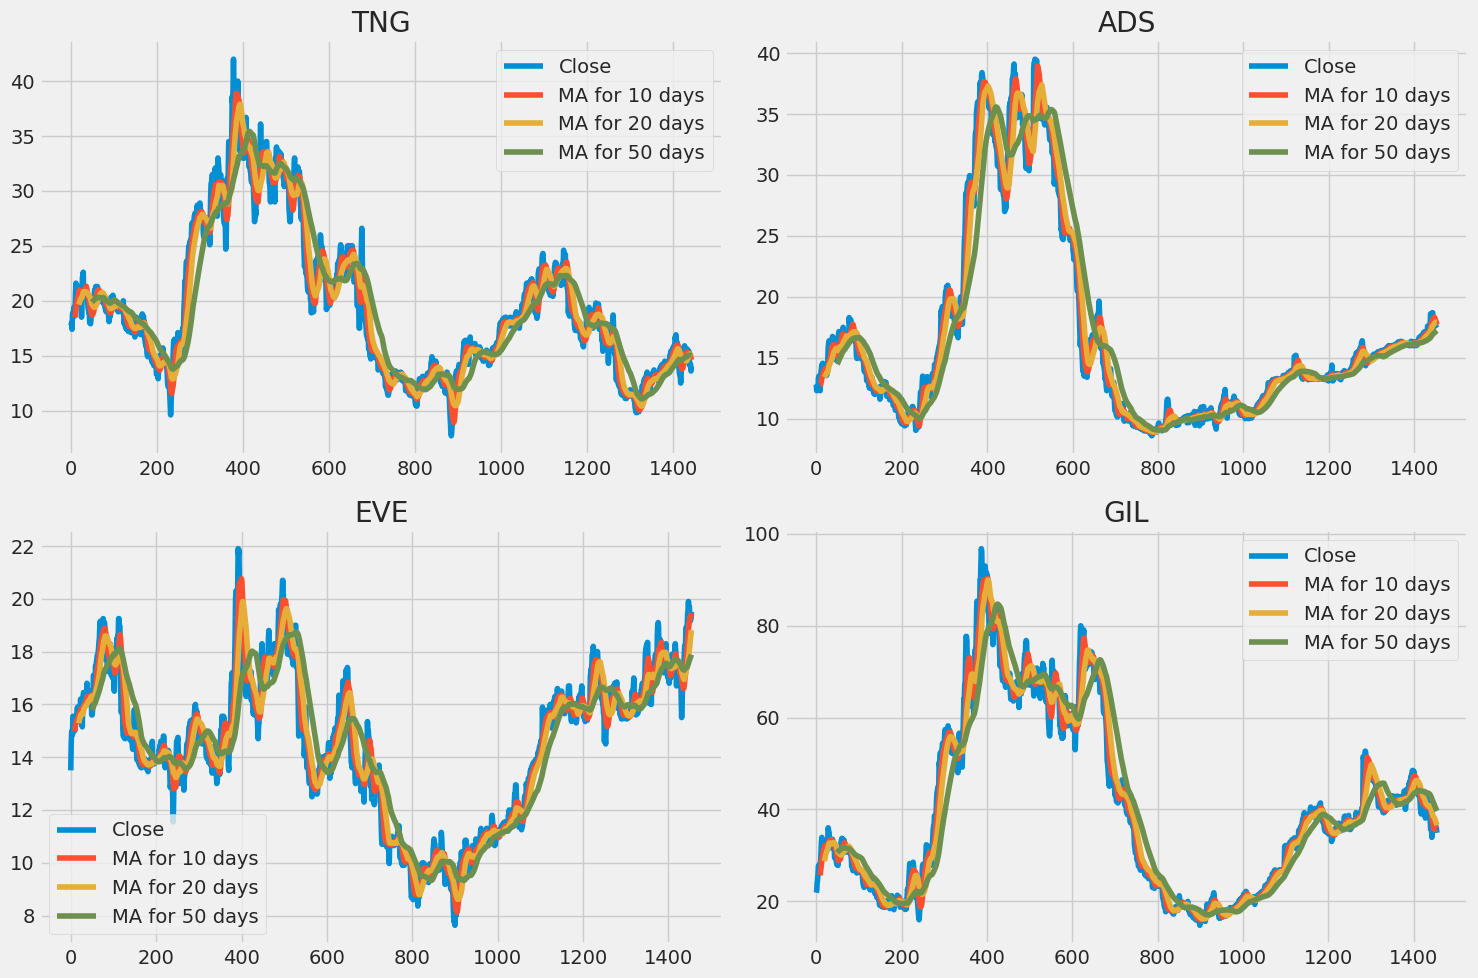

In [102]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TNG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TNG')

ADS[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('ADS')

EVE[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('EVE')

GIL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('GIL')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the ADS stock.

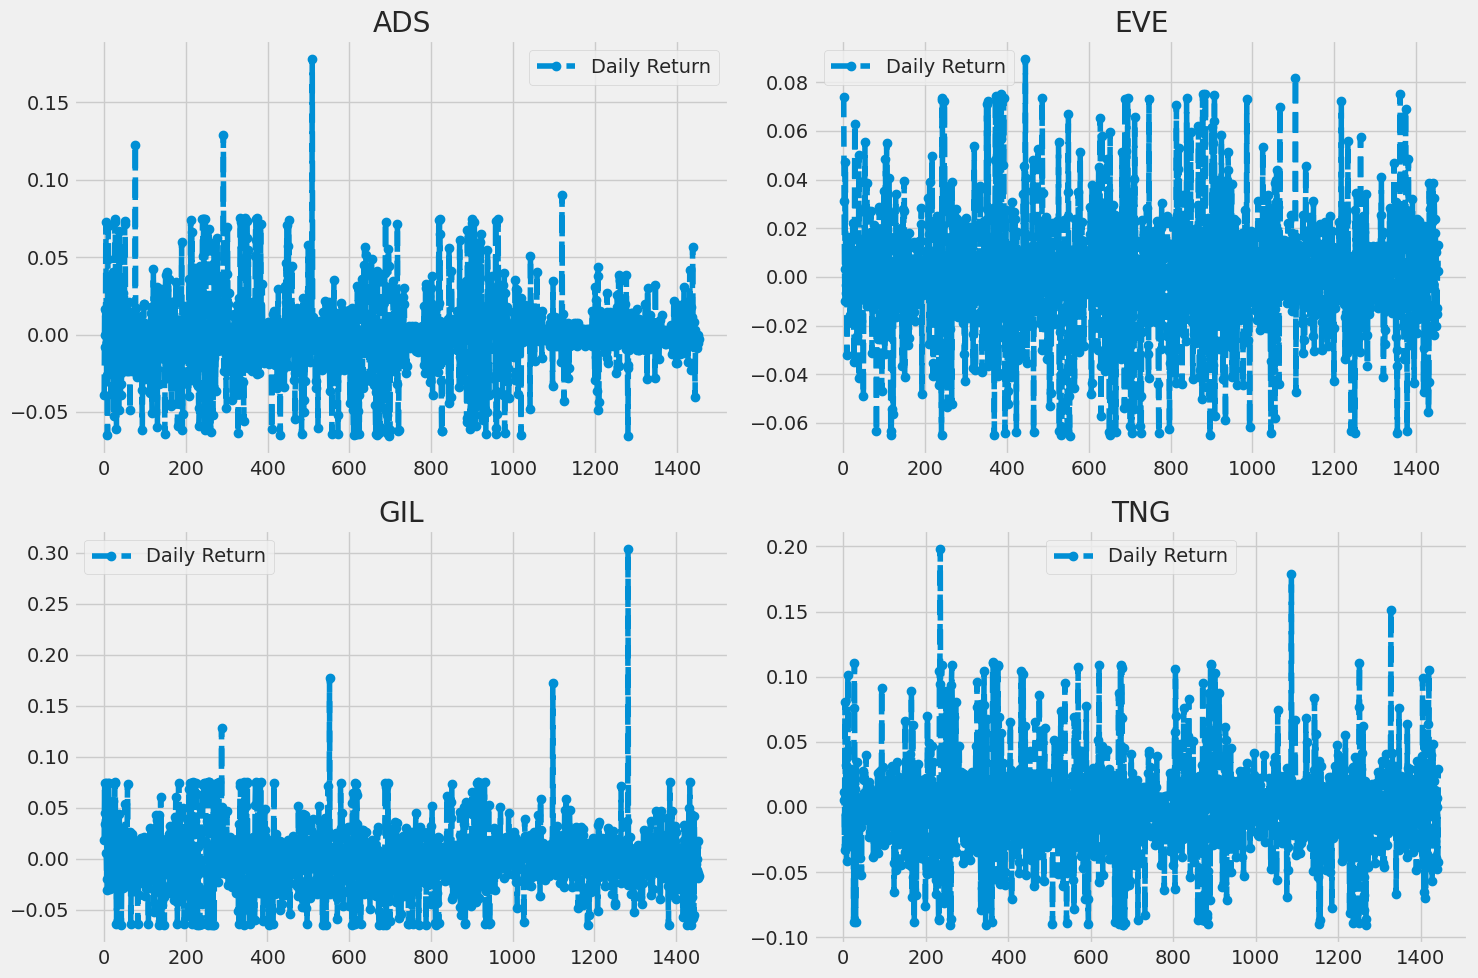

In [103]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ADS['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('ADS')

EVE['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('EVE')

GIL['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('GIL')

TNG['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TNG')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

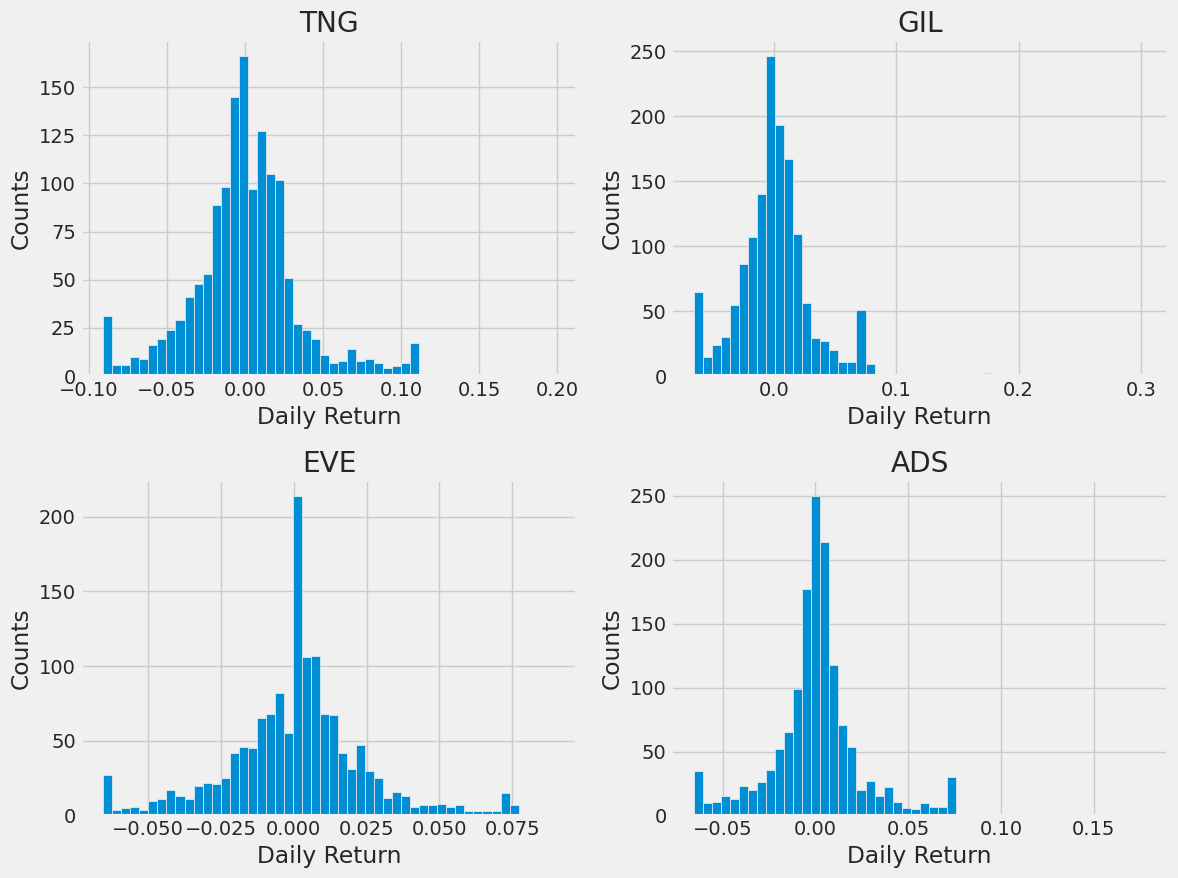

In [104]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [105]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = TNG.copy()
closing_df['TNG'] = TNG['Close'].copy()
closing_df['ADS'] = ADS['Close'].copy()
closing_df['EVE'] = EVE['Close'].copy()
closing_df['GIL'] = GIL['Close'].copy()
closing_df.drop(["Unnamed: 7","Date","Close","Adj Close","Volume","Open","High","Low","company_name","MA for 10 days","MA for 20 days","MA for 50 days","Daily Return"],axis=1,inplace=True)
print(closing_df.head())

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


    TNG   ADS    EVE    GIL
0  17.7  12.8  13.50  21.85
1  17.8  12.3  14.50  22.25
2  18.0  12.5  14.95  23.90
3  17.4  12.5  15.00  24.70
4  18.8  12.4  14.85  25.80


,TNG,ADS,EVE,GIL
0,NaN,NaN,NaN,NaN
1,0.005650,-0.039062,0.074074,0.018307
2,0.011236,0.016260,0.031034,0.074157
3,-0.033333,0.000000,0.003344,0.033473
4,0.080460,-0.008000,-0.010000,0.044534


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

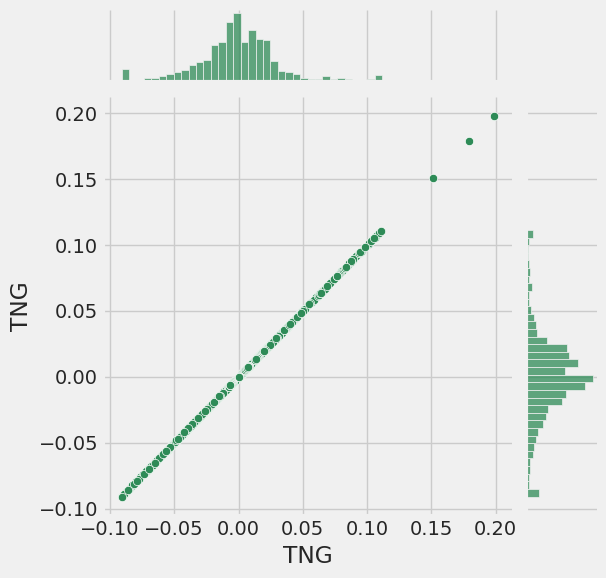

In [106]:
# Comparing EVE to itself should show a perfectly linear relationship
sns.jointplot(x='TNG', y='TNG', data=tech_rets, kind='scatter', color='seagreen')

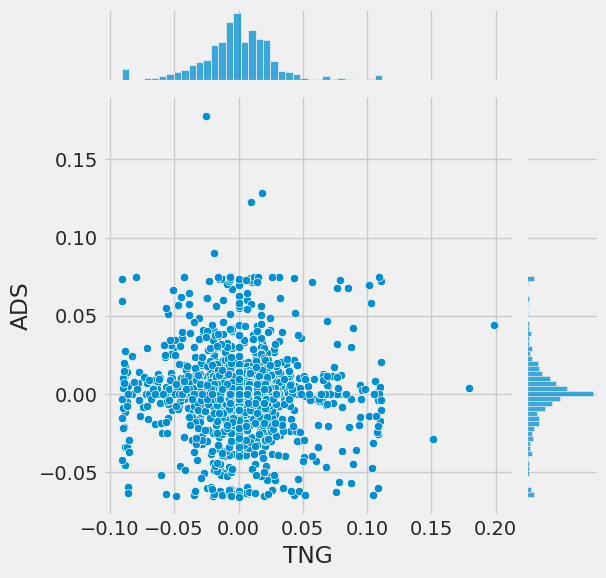

In [107]:
# We'll use joinplot to compare the daily returns of EVE and GIL
sns.jointplot(x='TNG', y='ADS', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

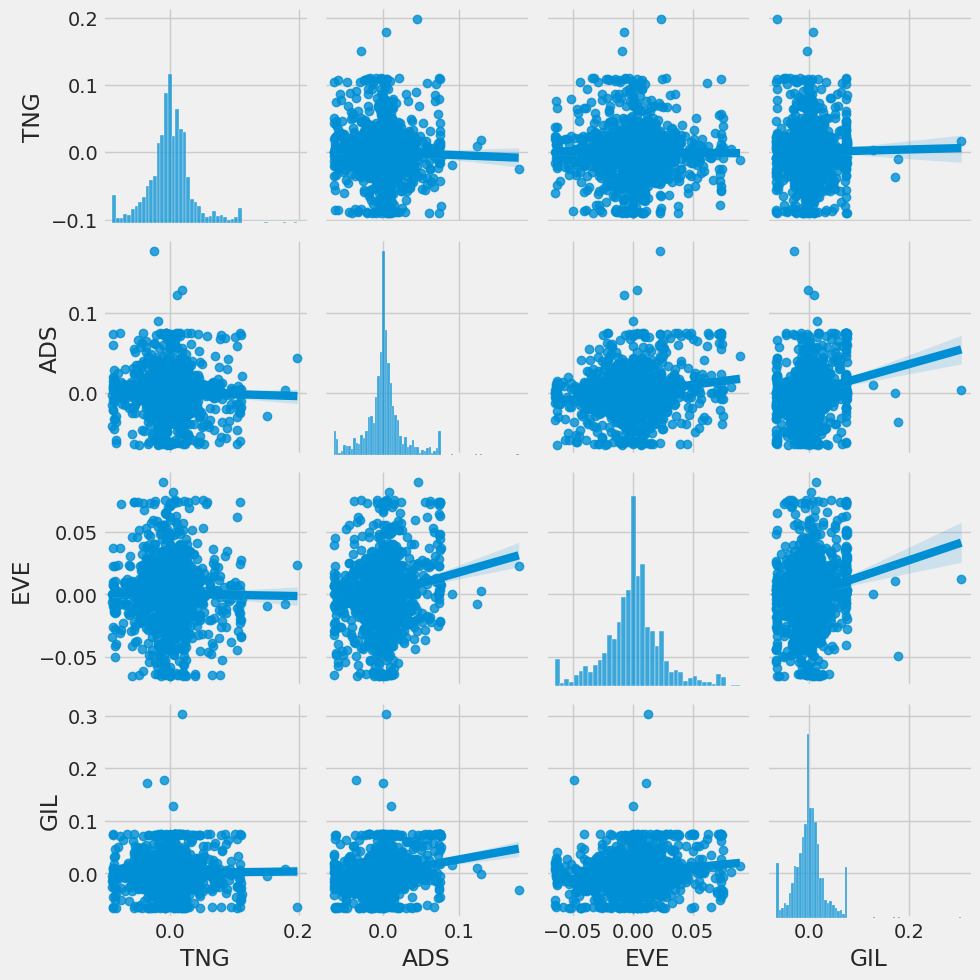

In [108]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between EVE and TNG daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

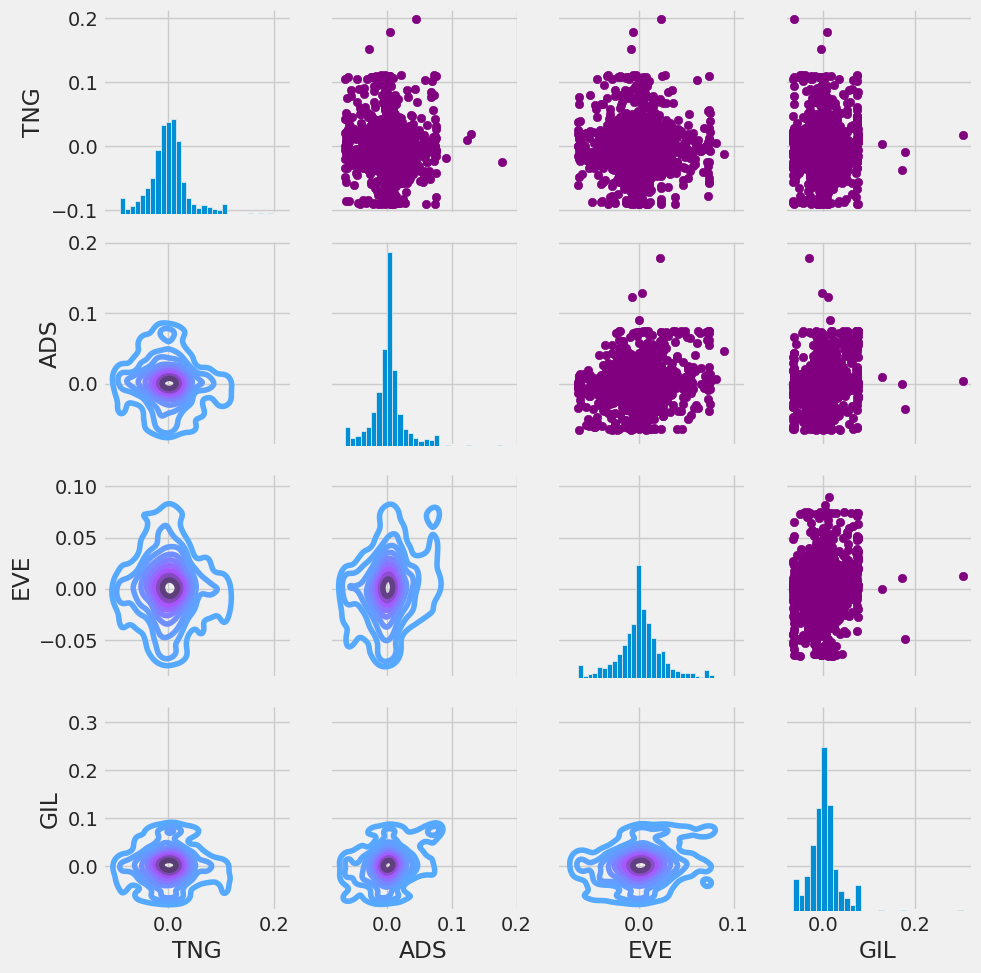

In [109]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

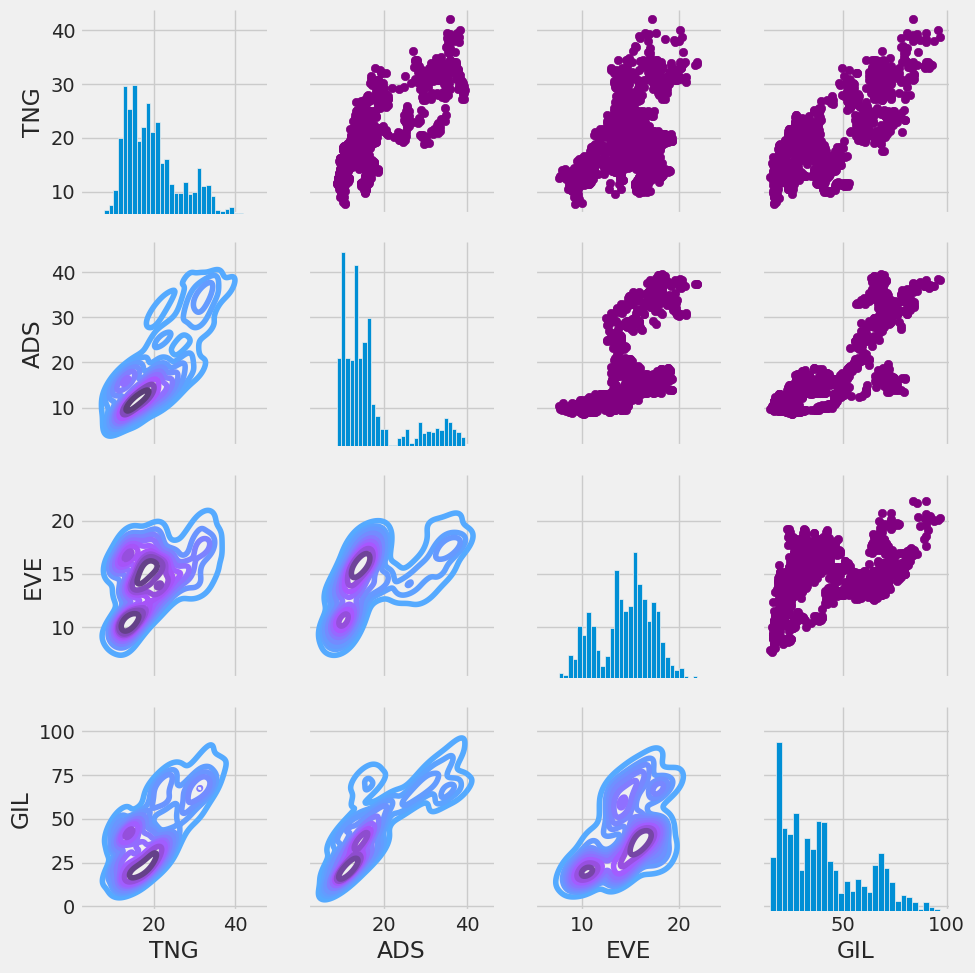

In [110]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between GIL and ADS.

Text(0.5, 1.0, 'Correlation of stock closing price')

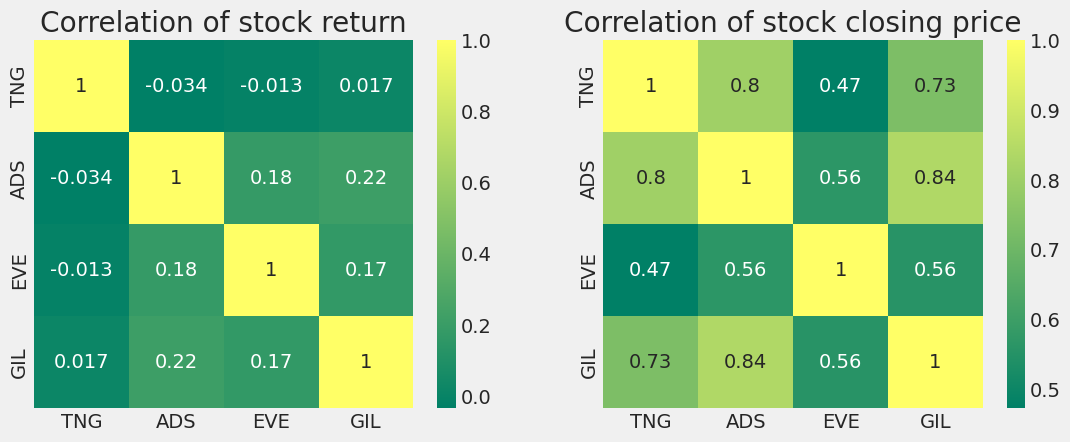

In [111]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that GIL and TNG had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

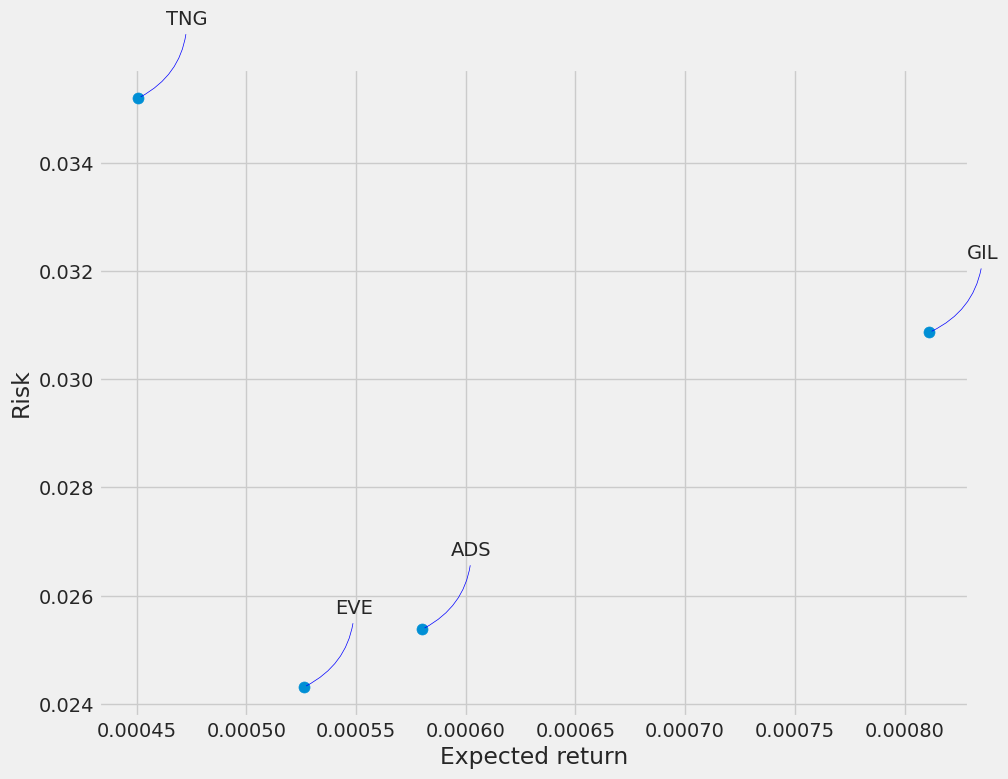

In [112]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of ADS inc:

In [113]:
# Get the stock quote
df = TNG
# Show teh data
df

,Date,Close,Adj Close,Volume,Open,High,Low,Unnamed: 7,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
0,2023-11-01,17.7,0.00,1230405.0,17.8,17.8,17.0,NaN,TNG,NaN,NaN,NaN,NaN
1,2023-10-31,17.8,0.00,1838409.0,16.2,18.0,16.2,NaN,TNG,NaN,NaN,NaN,0.005650
2,2023-10-30,18.0,0.00,1385227.0,17.6,18.2,17.6,NaN,TNG,NaN,NaN,NaN,0.011236
3,2023-10-26,17.4,0.00,3592922.0,18.8,18.9,17.2,NaN,TNG,NaN,NaN,NaN,-0.033333
4,2023-10-25,18.8,0.00,1416201.0,19.1,19.4,18.7,NaN,TNG,NaN,NaN,NaN,0.080460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,2018-01-08,14.1,5.90,372514.0,14.0,14.1,13.8,NaN,TNG,15.16,15.150,15.038,-0.047297
1439,2018-01-05,14.1,5.90,437204.0,14.2,14.3,13.9,NaN,TNG,15.06,15.120,15.044,0.000000
1440,2018-01-04,14.2,5.94,762249.0,13.9,14.5,13.9,NaN,TNG,14.94,15.095,15.044,0.007092
1441,2018-01-03,13.6,5.69,438844.0,14.0,14.0,13.6,NaN,TNG,14.77,15.025,15.022,-0.042254


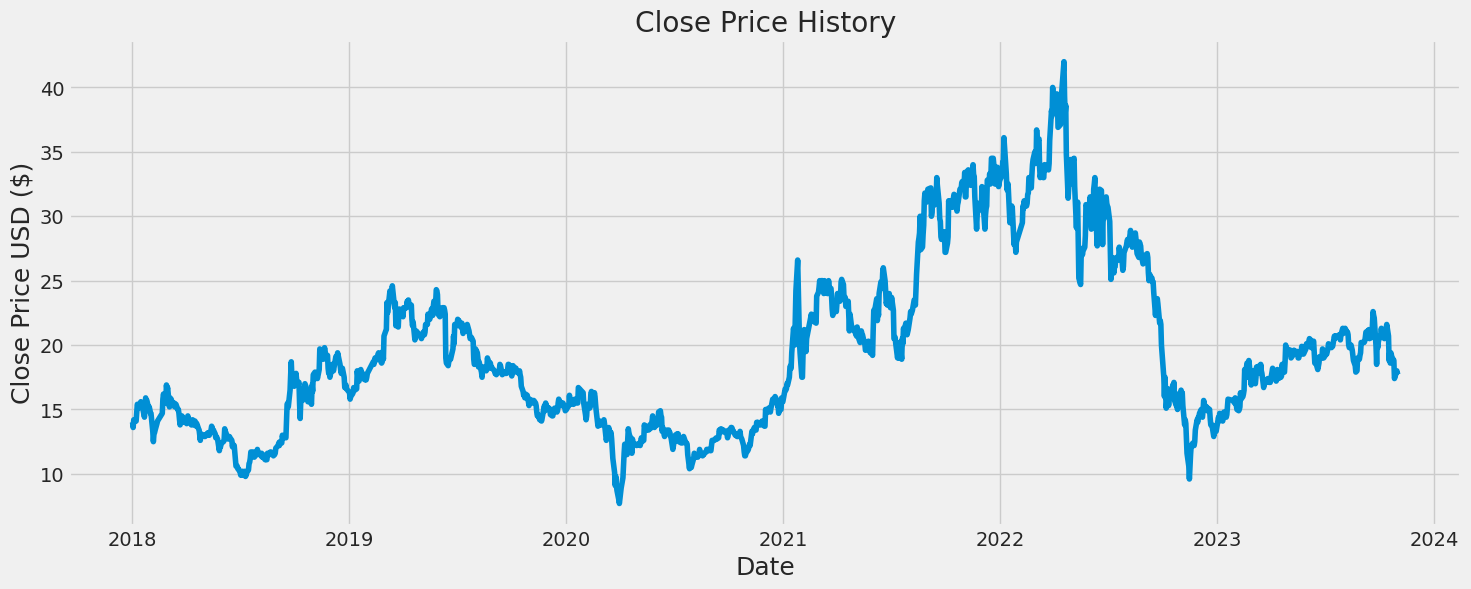

In [114]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df["Date"],df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [115]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1371

In [116]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.29154519],
       [0.29446064],
       [0.30029155],
       ...,
       [0.18950437],
       [0.17201166],
       [0.18367347]])

In [117]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.29154519, 0.29446064, 0.30029155, 0.28279883, 0.32361516,
       0.32653061, 0.32361516, 0.34110787, 0.31778426, 0.34110787,
       0.32361516, 0.37900875, 0.40524781, 0.39358601, 0.39358601,
       0.39067055, 0.37317784, 0.3819242 , 0.37900875, 0.39650146,
       0.37900875, 0.37900875, 0.36734694, 0.35276968, 0.36734694,
       0.3148688 , 0.35568513, 0.41982507, 0.42565598, 0.43440233,
       0.37609329, 0.37317784, 0.39358601, 0.39067055, 0.39067055,
       0.3877551 , 0.37609329, 0.36734694, 0.36443149, 0.36443149,
       0.34110787, 0.33527697, 0.32653061, 0.32944606, 0.30029155,
       0.30029155, 0.29737609, 0.31195335, 0.32361516, 0.33527697,
       0.34693878, 0.35276968, 0.35860058, 0.35276968, 0.35860058,
       0.3819242 , 0.3877551 , 0.3877551 , 0.39650146, 0.39358601])]
[0.39067055393586014]

[array([0.29154519, 0.29446064, 0.30029155, 0.28279883, 0.32361516,
       0.32653061, 0.32361516, 0.34110787, 0.31778426, 0.34110787,
       0.32361516, 0.37900875, 0.40

In [118]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1311/1311 [==============================] - 38s 26ms/step - loss: 0.0038


In [119]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 [==============================] - 1s 21ms/step


0.7723299611790483

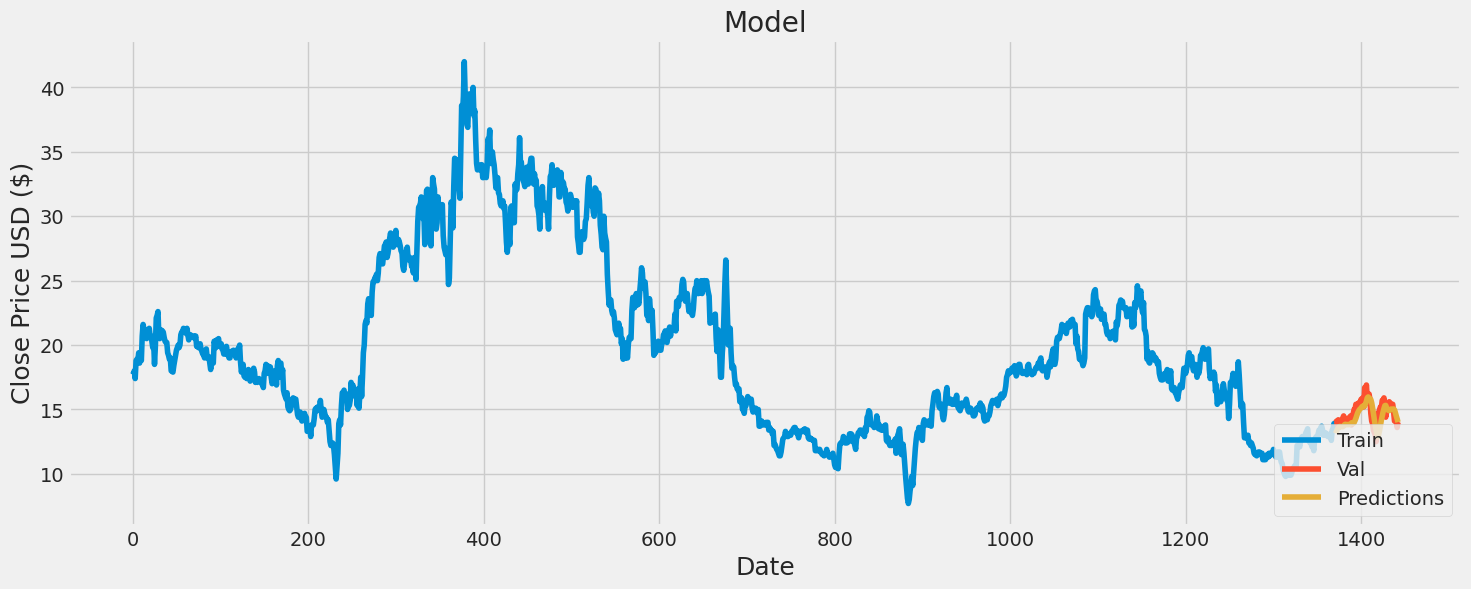

In [120]:
# Plot the data
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [121]:
# Show the valid and predicted prices
valid

,Close,Predictions
1371,14.0,13.138197
1372,14.1,13.313930
1373,13.8,13.481584
1374,14.2,13.569805
1375,13.8,13.666598
...,...,...
1438,14.1,14.965628
1439,14.1,14.745433
1440,14.2,14.489346
1441,13.6,14.272877


In [143]:
tng_data=TNG[["Date","Close"]]

In [144]:
tng_data.head()

,Date,Close
0,2023-11-01,17.7
1,2023-10-31,17.8
2,2023-10-30,18.0
3,2023-10-26,17.4
4,2023-10-25,18.8


In [145]:
print("Min. Tarih:",tng_data["Date"].min())
print("Max. Tarih:",tng_data["Date"].max())

Min. Tarih: 2018-01-02 00:00:00
Max. Tarih: 2023-11-01 00:00:00


In [146]:
tng_data.index=tng_data['Date']
tng_data

,Date,Close
Date,,
2023-11-01,2023-11-01,17.7
2023-10-31,2023-10-31,17.8
2023-10-30,2023-10-30,18.0
2023-10-26,2023-10-26,17.4
2023-10-25,2023-10-25,18.8
...,...,...
2018-01-08,2018-01-08,14.1
2018-01-05,2018-01-05,14.1
2018-01-04,2018-01-04,14.2


In [149]:
tng_data.drop("Date",axis=1,inplace=True)

/tmp/ipykernel_47/1171387935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tng_data.drop("Date",axis=1,inplace=True)


In [150]:
tng_data

,Close
Date,
2023-11-01,17.7
2023-10-31,17.8
2023-10-30,18.0
2023-10-26,17.4
2023-10-25,18.8
...,...
2018-01-08,14.1
2018-01-05,14.1
2018-01-04,14.2


In [151]:
result_data=tng_data.copy()

In [152]:
tng_data=tng_data.values

In [153]:
tng_data[0:5]

array([[17.7],
       [17.8],
       [18. ],
       [17.4],
       [18.8]])

In [154]:
tng_data=tng_data.astype("float32")

In [155]:
def split_data(dataframe,test_size):
    pos=int(round(len(dataframe)*(1-test_size)))
    train=dataframe[:pos]
    test=dataframe[pos:]
    return train,test,pos

In [156]:
train,test,pos=split_data(tng_data,0.20)

In [157]:
print(train.shape,test.shape)

(1154, 1) (289, 1)


In [158]:
scaler_train=MinMaxScaler(feature_range=(0,1))

In [159]:
train=scaler_train.fit_transform(train)

In [160]:
scaler_test=MinMaxScaler(feature_range=(0,1))
test=scaler_test.fit_transform(test)

In [161]:
train[0:5]

array([[0.2915452 ],
       [0.29446065],
       [0.30029154],
       [0.28279883],
       [0.32361513]], dtype=float32)

In [162]:
test[0:5]

array([[1.        ],
       [0.9646019 ],
       [0.80530965],
       [0.858407  ],
       [0.78761065]], dtype=float32)

In [163]:
def create_features(data,lookback):
    X,Y=[],[]
    for i in range(lookback,len(data)):
        X.append(data[i-lookback:i,0])
        Y.append(data[i,0])
    return np.array(X),np.array(Y)

In [164]:
lookback=20

In [165]:
X_train,y_train=create_features(train,lookback)

In [166]:
X_test,y_test=create_features(test,lookback)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1134, 20) (1134,) (269, 20) (269,)


In [ ]:
X_train[0:5]
y_test[0:5]

In [167]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1134, 1, 20) (1134, 1) (269, 1, 20) (269, 1)


In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [172]:
model=Sequential()
model.add(LSTM(units=50,
              activation="relu",
              input_shape=(X_train.shape[1],lookback)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50)                14200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14251 (55.67 KB)
Trainable params: 14251 (55.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [174]:
callbacks=[EarlyStopping(monitor="val_loss",patience=3,verbose=1,mode="min"),
          ModelCheckpoint(filepath="mymodel.h5",monitor="val_loss",mode="min",
                         save_best_only=True,save_weights_only=False,verbose=1)]

In [175]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data=(X_test,y_test),
                    callbacks=callbacks,
                    shuffle=False)

Epoch 1/100
52/57 [==========================>...] - ETA: 0s - loss: 0.0670 
Epoch 1: val_loss improved from inf to 0.01576, saving model to mymodel.h5
57/57 [==============================] - 2s 8ms/step - loss: 0.0618 - val_loss: 0.0158
Epoch 2/100
52/57 [==========================>...] - ETA: 0s - loss: 0.0079
Epoch 2: val_loss improved from 0.01576 to 0.01025, saving model to mymodel.h5
57/57 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0103


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/100
54/57 [===========================>..] - ETA: 0s - loss: 0.0069
Epoch 3: val_loss did not improve from 0.01025
57/57 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0108
Epoch 4/100
53/57 [==========================>...] - ETA: 0s - loss: 0.0060
Epoch 4: val_loss improved from 0.01025 to 0.00983, saving model to mymodel.h5
57/57 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0098
Epoch 5/100
54/57 [===========================>..] - ETA: 0s - loss: 0.0060
Epoch 5: val_loss did not improve from 0.00983
57/57 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0099
Epoch 6/100
54/57 [===========================>..] - ETA: 0s - loss: 0.0059
Epoch 6: val_loss did not improve from 0.00983
57/57 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0111
Epoch 7/100
55/57 [===========================>..] - ETA: 0s - loss: 0.0057
Epoch 7: val_loss did not improve from 0.00983
57/57

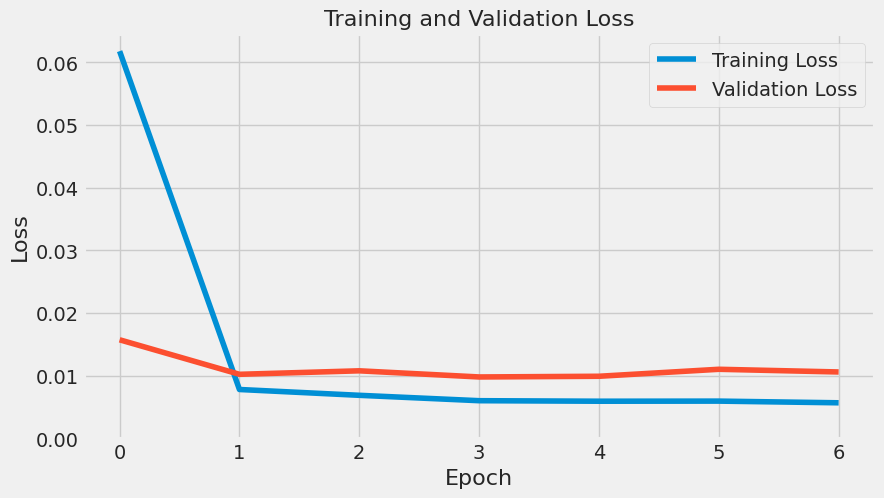

In [176]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Validation Loss",fontsize=16)
plt.show()

In [177]:
loss=model.evaluate(X_test,y_test,batch_size=20)
print("\nTest loss:%.1f%%"%(100.0*loss))

14/14 [==============================] - 0s 2ms/step - loss: 0.0106

Test loss:1.1%


In [178]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler_train.inverse_transform(train_predict)
test_predict=scaler_test.inverse_transform(test_predict)
y_train=scaler_train.inverse_transform(y_train)
y_test=scaler_test.inverse_transform(y_test)

9/9 [==============================] - 0s 2ms/step


In [179]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [180]:
train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict,))
print(f"Train RMSE:{train_rmse}")
print(f"Test RMSE:{test_rmse}")

Train RMSE:2.4785587787628174
Test RMSE:1.1647839546203613


In [181]:
train_prediction_data=result_data[lookback:pos]
train_prediction_data["Predicted"]=train_predict
train_prediction_data.head()

/tmp/ipykernel_47/3382785562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_prediction_data["Predicted"]=train_predict


,Close,Predicted
Date,,
2023-10-03,20.7,18.869293
2023-10-02,20.7,18.993685
2023-09-29,20.3,19.083637
2023-09-28,19.8,19.121565
2023-09-27,20.3,19.169115


In [182]:
test_prediction_data=result_data[pos+lookback:]
test_prediction_data["Predicted"]=test_predict
test_prediction_data.head()

/tmp/ipykernel_47/3631762894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_prediction_data["Predicted"]=test_predict


,Close,Predicted
Date,,
2019-01-28,17.3,17.265757
2019-01-25,17.4,17.097263
2019-01-24,17.8,16.986599
2019-01-23,17.8,16.874397
2019-01-22,17.8,16.768230


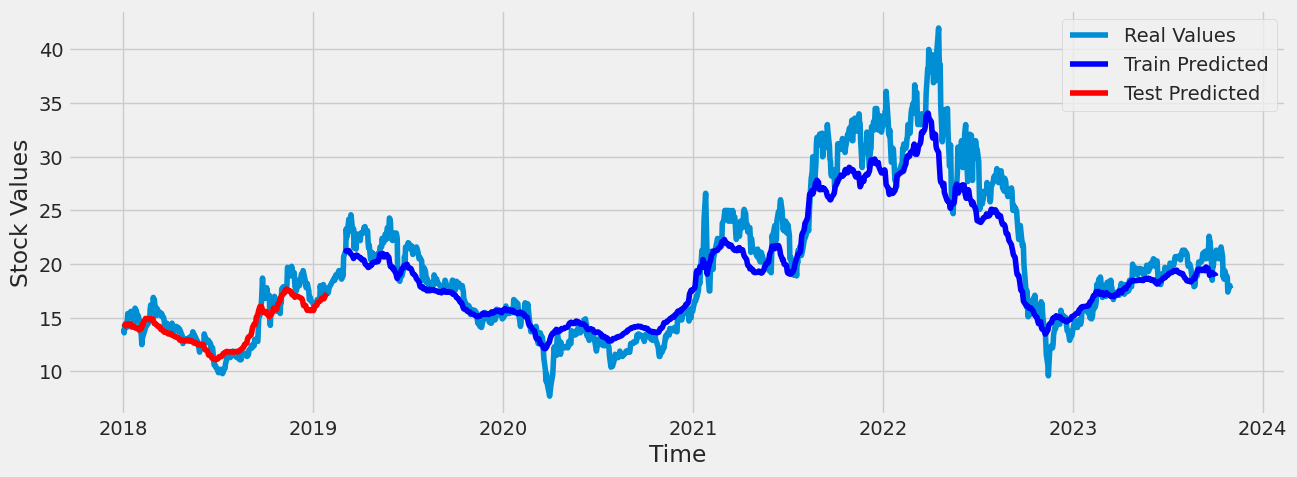

In [183]:
plt.figure(figsize=(14,5))
plt.plot(result_data,label="Real Values")
plt.plot(train_prediction_data["Predicted"],color="blue",label="Train Predicted")
plt.plot(test_prediction_data["Predicted"],color="red",label="Test Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Values")
plt.legend()
plt.show()